# Phân tích cảm xúc với LSTMs

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/CS431/assignment3-master

/content/drive/MyDrive/CS431/assignment3-master


In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
import numpy as np
import os
currentDir = '/content/drive/MyDrive/CS431/assignment3-master'

wordsList = np.load(os.path.join(currentDir, 'wordsList.npy'))
#wordsList = np.load('wordslist.npy')
print('Simplified vocabulary loaded!')
wordsList = wordsList.tolist()
#wordsList = [word.decode('UTF-8') for word in wordsList] #Encode words as UTF-8
wordVectors = np.load(os.path.join(currentDir, 'wordVectors.npy'))
#wordVectors = np.load('wordVectors.npy')
wordVectors = np.float32(wordVectors)
print ('Word embedding matrix loaded!')

Simplified vocabulary loaded!
Word embedding matrix loaded!


Để chắc chắn mọi dữ liệu được load lên một cách chính xác, chúng ta cần kiểm tra xem số lượng từ trong từ điển rút gọn và số chiều của ma trận word embedding có khớp với nhau hay không? Trong trường hợp này số từ mà chúng tôi giữ lại là 19,899 và số chiều trong không gian biểu diễn là 300 chiều.

In [ ]:
print('Size of the vocabulary: ', len(wordsList))
print('Size of the word embedding matrix: ', wordVectors.shape)

Size of the vocabulary:  19899
Size of the word embedding matrix:  (19899, 300)


## Word2Vec trên một từ đơn

Để có thể xác định được vector biểu diễn của một từ tiếng Việt. Đầu tiên chúng ta sẽ xác định xem vị trí của từ đó trong wordsList. Sau đó lấy vector ở dòng tương ứng trên trên ma trận wordVectors. 

In [ ]:
ngon_idx = wordsList.index('ngon')
print('Index of `ngon` in wordsList: ', ngon_idx)
ngon_vec = wordVectors[ngon_idx]
print('Vector representation of `ngon` is: ', ngon_vec)

Index of `ngon` in wordsList:  14598
Vector representation of `ngon` is:  [-2.040e-02 -9.800e-03  2.290e-01 -3.770e-02  5.430e-02 -2.680e-02
  2.190e-02 -6.290e-02 -2.200e-02 -1.010e-02  8.300e-03 -8.810e-02
 -3.630e-02  7.820e-02 -7.780e-02 -4.930e-02 -6.600e-03 -1.026e-01
 -1.040e-02  5.380e-02  4.100e-02  6.530e-02 -2.770e-02 -6.340e-02
  2.270e-02  4.420e-02  3.340e-02 -4.960e-02  8.290e-02 -3.990e-02
  3.750e-02  1.800e-02 -1.115e-01 -7.200e-02 -5.060e-02 -1.051e-01
 -4.560e-02 -1.765e-01 -3.300e-02 -6.800e-03  5.580e-02 -4.180e-02
  4.380e-02  4.940e-02  7.400e-03  4.020e-02 -8.850e-02 -9.840e-02
 -5.210e-02 -5.500e-03  3.730e-02 -8.460e-02 -6.910e-02 -4.980e-02
 -3.910e-02 -4.980e-02 -8.690e-02  6.100e-03 -5.360e-02 -3.800e-03
  1.162e-01 -4.160e-02  5.000e-03 -7.240e-02 -3.320e-02  1.800e-02
  1.200e-02 -4.420e-02  1.350e-01  6.580e-02 -1.110e-02  1.960e-02
  1.750e-02  2.010e-02  2.200e-03  1.810e-01 -6.610e-02 -6.860e-02
 -4.690e-02  7.890e-02  6.880e-02 -5.320e-02  2.770e-02

### ToDo 3.1: Word2Vec để biểu diễn một đoạn văn bản

Nâng cấp hơn so với phiên bản Word2Vec cho từ đơn, phần này chúng ta sẽ biểu diễn một câu dưới dạng một ma trận gồm các vector biểu diễn của từng từ chồng lên nhau.

Ví dụ như chúng ta muốn biểu diễn câu "Món này ăn hoài không biết chán". Đầu tiên, với mỗi từ trong câu ta sẽ tìm chỉ số tương ứng trong từ điển và lưu vào vector đặt tên là 'sentenceIndexes'. Sau đó, chúng ta có thể sử dụng hàm tra cứu ma trận word embedding của thư viện Tensorflow tf.nn.embedding_lookup để tra các vector tại các chỉ số trong 'sentenceIndexes'. Như vậy nếu chúng ta sử dụng tối đa 10 từ để lưu trữ cho một câu thì ma trận biểu diễn cho câu sẽ là một ma trận kích thước 10 x 300.

![caption](Images/embedding.png)

In [ ]:
!activate tf-gpu

/bin/bash: activate: command not found


In [ ]:

maxSeqLength = 10   #Maximum length of sentence
numDimensions = 300 #Dimensions for each word vector
sentenceIndexes = np.zeros((maxSeqLength), dtype='int32')

# TODO 3.1: Gán chỉ số của các từ trong câu và 'sentenceIndexes'
sentenceIndexes[0] = wordsList.index('món')
sentenceIndexes[1] = wordsList.index('này')
sentenceIndexes[2] = wordsList.index('ăn')
sentenceIndexes[3] = wordsList.index('hoài')
sentenceIndexes[4] = wordsList.index('không')
sentenceIndexes[5] = wordsList.index('biết')
sentenceIndexes[6] = wordsList.index('chán')

# Các chỉ số 7, 8, 9 của sentenceIndexes  vẫn được gán bằng 0 như cũ
print(sentenceIndexes.shape)
print('Row index for each word: ', sentenceIndexes)

# Ma trận biểu diễn:
print('Sentence representation of word vectors:')
with tf.Session() as sess:
    print(tf.nn.embedding_lookup(wordVectors,sentenceIndexes).eval().shape)

(10,)
Row index for each word:  [  119  8136  4884 18791 16614 15951  3371     0     0     0]
Sentence representation of word vectors:
(10, 300)


Nếu như thực hiện đúng thì vector 'sentenceIndexes' sẽ có giá trị là: [119, 8136, 4884, 18791, 16614, 15951, 3371, 0, 0, 0]

# 2. Khảo sát tập dữ liệu huấn luyện và tạo ma trận ID

In [ ]:
from os import listdir
from os.path import isfile, join
positiveFiles = ['positiveReviews/' + f for f in listdir('positiveReviews/') if isfile(join('positiveReviews/', f))]
negativeFiles = ['negativeReviews/' + f for f in listdir('negativeReviews/') if isfile(join('negativeReviews/', f))]
numWords = []
for pf in positiveFiles:
    with open(pf, "r", encoding='utf-8') as f:
        line=f.readline()
        counter = len(line.split())
        numWords.append(counter)       
print('Positive files finished')

for nf in negativeFiles:
    with open(nf, "r", encoding='utf-8') as f:
        line=f.readline()
        counter = len(line.split())
        numWords.append(counter)  
print('Negative files finished')

numFiles = len(numWords)
print('The total number of files is', numFiles)
print('The total number of words in the files is', sum(numWords))
print('The average number of words in the files is', sum(numWords)/len(numWords))

Positive files finished
Negative files finished
The total number of files is 30000
The total number of words in the files is 1770824
The average number of words in the files is 59.02746666666667


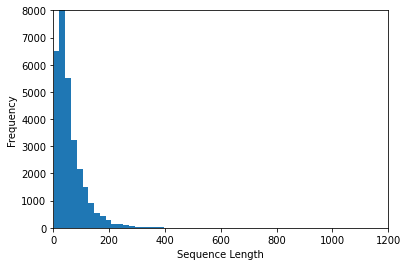

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(numWords, 50)
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.axis([0, 1200, 0, 8000])
plt.show()

In [ ]:
maxSeqLength = 180

Để có cảm nhận rõ hơn về dữ liệu, chúng ta có thể hiển thị một số review bất kỳ như sau.

In [ ]:
print('A positive sentence: ')
fname = positiveFiles[3] # Randomly select a positive file to view
with open(fname, encoding='utf-8') as f:
    for lines in f:
        print(lines)

print('A negative sentence: ')
fname = negativeFiles[10] # Randomly select a negative file to view
with open(fname, encoding='utf-8') as f:
    for lines in f:
        print(lines)


A positive sentence: 
Buổi_trưa Leng_Keng không đông , lác_đác vài bàn nên các bạn phục_vụ rất nhanh , mình đi dạo 1 vòng vì rất ấn_tượng những bảng_hiệu của quán . Không_chỉ bảng_hiệu mà đến wc cũng rất dễ_thương , tò_mò quá , không biết bên wc nữ thì thế_nào nhỉ ? Có bạn nữ nào update dùm mình để mở_mang tầm_mắt không : v

Tụi mình có chọn vài món nướng do các bạn phục_vụ có giới_thiệu , không biết phải trúng món tủ của Leng_Keng không nhưng đậm_đà vừa_miệng , trưa lai_rai thêm mấy lon Tiger , mấy anh_em ngồi chém gió khá thoải_mái ( đến tận gần 3h chiều ) . Phục_vụ lâu nhưng thái_độ của các bạn PV rất thiện_chí : ) ) , hay do mình say nên thấy vậy nhi ?

Nghe_nói Leng_Keng buổi tối đông , hôm nào đi thử vì thấy không_gian của quán mùa này ngồi hàn_huyên chắc tuyệt lắm .

A negative sentence: 
Quán này dc cái là k gian trên tầng đẹp nhưng nhân_viên còn khá chậm . Thêm một điều là họ vẫn chưa hiểu hết khách order gì , khi tôi yêu_cầu một phần Chocolate bạc_hà , không đường nhiều bạc_h

## Chuẩn hoá văn bản và tách từ

In [ ]:
# Removes punctuation, parentheses, question marks, etc., and leaves only alphanumeric characters
import re
strip_special_chars = re.compile("[^\w0-9 ]+")

def cleanSentences(string):
    string = string.lower().replace("<br />", " ")
    return re.sub(strip_special_chars, "", string.lower())

### ToDo 3.2: xác định chỉ số của từng từ trong review

In [ ]:
ids = np.zeros((numFiles, maxSeqLength), dtype='int32')
nFiles = 0
# Index of Unknow word
unk_idx = wordsList.index('UNK')

for pf in positiveFiles:
    with open(pf, "r", encoding="utf-8") as f:
        nIndexes = 0
        line=f.readline()
        cleanedLine = cleanSentences(line)
        split = cleanedLine.split()
        for word in split:
            # TODO 3.2: Nếu 'word' thuộc tập 'wordsList' thì gán chỉ số của 'word' vào ma trận ids
            try:
                ids[nFiles][nIndexes] = wordsList.index(word)
            # Ngược lại: gán 'unk_idx' vào ma trận ids
            except:
                ids[nFiles][nIndexes] = unk_idx
            
            nIndexes = nIndexes + 1
            if nIndexes >= maxSeqLength:
                break
        nFiles = nFiles + 1 

print('Positive files are indexed!')
for nf in negativeFiles:
    with open(nf, "r", encoding="utf-8") as f:
        nIndexes = 0
        line=f.readline()
        cleanedLine = cleanSentences(line)
        split = cleanedLine.split()
        for word in split:
            # ToDo 3.2: tương tự như trên. Không khác gì hết.
            try:
                ids[nFiles][nIndexes] = wordsList.index(word)
            except:
                ids[nFiles][nIndexes] = unk_idx
                
            nIndexes = nIndexes + 1
            if nIndexes >= maxSeqLength:
                break
        nFiles = nFiles + 1 

print('Negative files are indexed!')
# Save ids Matrix for future uses.
#np.save(os.path.join(currentDir,'idsMatrix.npy'), ids)
np.save('idsMatrix.npy',ids)

Positive files are indexed!
Negative files are indexed!


In [ ]:
# LƯU Ý: Bước thực hiện trên tương đối mất thời gian.
# Trường hợp đã tính toán và lưu ma trận 'ids' rồi thì ta có thể load lên để sử dụng luôn
ids = np.load(os.path.join(currentDir,'idsMatrix.npy'))
#ids = np.load('idsMatrix.npy')
print('Word indexes of the first review: ', ids[0])

Word indexes of the first review:  [ 7446 11694 11440 11975  8136 18109 15221  9051 18101 11975 18313  7080
 11975 15993 10610 18109  2876 10642  4756 15570  2331 11440  4826 10231
  1346   255  9071  4935  6263   255 13800  6874   557 15522  4826  1046
  1528 16601  9071  7456 14855 19492  1346  9649 13800   624 11154  3902
  1868 11417  2986  5175 16760 10642  6287 15570  2682 10642 14598 13969
  9887  9071  3553   251 15240   877  8333  9572  7352  9572 13145  5244
 15522  1131  4884 11417  5416  7352  5175  6874  4756  9334  3364  4826
  9051  4884 17511 12225 18941 10138 16235 17162  6915  2750 10642 19193
 15522 12778 11975 14595  2374  2997 15570 18160 13952  5767  6874  7255
  2876 14597     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0    

Nếu như quá trình chuyển từ câu dạng văn bảng sang vector các chỉ số trong từ điển ở trên đúng thì ids[0] sẽ nhận giá trị: [19898  1906  4454  5284 10661 11694 11994 18784 18569 18619 13174  9821 ...]

## Xây dựng hàm lấy dữ liệu train và test theo từng batch

In [ ]:
from random import randint

def getTrainBatch():
    labels = []
    arr = np.zeros([batchSize, maxSeqLength])
    for i in range(batchSize):
        if (i % 2 == 0): 
            # Pick positive samples randomly
            num = randint(1,13999)
            labels.append([1,0])
        else:
            # Pick negative samples randomly
            num = randint(15999,29999)
            labels.append([0,1])
        arr[i] = ids[num-1:num]
    return arr, labels

def getTestBatch():
    labels = []
    arr = np.zeros([batchSize, maxSeqLength])
    for i in range(batchSize):
        num = randint(13999,15999)
        if (num <= 14999):
            labels.append([1,0])
        else:
            labels.append([0,1])
        arr[i] = ids[num-1:num]
    return arr, labels

# 3. Xây dựng RNN Model với Tensorflow

In [ ]:
# Initialize paramters
numDimensions = 300
batchSize = 64
lstmUnits = 128
nLayers = 2
numClasses = 2
iterations = 5000

![caption](Images/data_batch.png)

## ToDo 3.3: Xác định input và output

In [ ]:
tf.disable_eager_execution()

In [ ]:
tf.compat.v1.reset_default_graph()

# TODO 3.3: Khởi tạo hai biến 'inputs' và 'labels'
inputs = tf.placeholder(tf.int32, [batchSize,maxSeqLength])
labels = tf.placeholder(tf.float32,[batchSize,numClasses])



![caption](Images/embedding_data.png)

In [ ]:
data = tf.nn.embedding_lookup(wordVectors, inputs)

In [ ]:
def generate_a_lstm_layer():
    # Khởi tạo một LSTM layer với 'lstmUnits' unit sử dụng hàm tf.contrib.rnn.BasicLSTMCell
    lstmLayer = tf.nn.rnn_cell.BasicLSTMCell(lstmUnits)
    # Sau đó tạo một lớp dropout để chống overfitting với hệ số out_keep_prob bằng 0.75
    # Sử dụng hàm tf.contrib.rnn.DropoutWrapper
    lstmLayer = tf.nn.rnn_cell.DropoutWrapper(cell=lstmLayer, output_keep_prob=0.75)
    return lstmLayer

# Sau khi đã có hàm tạo một LSTM Layer, ta sử dụng hàm này để chồng các LSTM lên
# Stack các LSTM layer với hàm tf.nn.rnn_cell.MultiRNNCell
lstmLayers = tf.nn.rnn_cell.MultiRNNCell([generate_a_lstm_layer() for i in range(nLayers)], state_is_tuple=True)
# Feed data variable vào mạng LSTM sử dụng hàm tf.nn.dynamic_rnn
initial_state = lstmLayers.zero_state(batchSize, tf.float32)
outputs, _ = tf.nn.dynamic_rnn(lstmLayers,data,dtype=tf.float32,initial_state=initial_state)
print(outputs)

<ipython-input-21-94a3de3536b8>:3: UserWarning: `tf.nn.rnn_cell.BasicLSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  lstmLayer = tf.nn.rnn_cell.BasicLSTMCell(lstmUnits)
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Tensor("rnn/transpose_1:0", shape=(64, 180, 128), dtype=float32)


Sau khi ra khỏi mạng LSTM, biến outputs sẽ là một tensor có kích thước [batchSize x maxSeqLength x lstmUnits], cụ thể là [64 x 180 x 128].

In [ ]:
weight = tf.Variable(tf.random.truncated_normal([lstmUnits, numClasses]))
bias = tf.Variable(tf.constant(0.1, shape=[numClasses]))

# Lấy giá trị output tại LSTM cell cuối cùng
outputs = tf.transpose(outputs, [1, 0, 2])
last = tf.gather(outputs, int(outputs.get_shape()[2]) - 1)
# Đưa qua mạng Fully Connected mà không có activation function
prediction = (tf.matmul(last, weight) + bias)
prediction

<tf.Tensor 'add:0' shape=(64, 2) dtype=float32>

In [ ]:
correctResult = tf.equal(tf.argmax(prediction,1), tf.argmax(labels,1))
accuracy = tf.reduce_mean(tf.cast(correctResult, tf.float32))

In [ ]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=labels))
optimizer = tf.train.AdamOptimizer().minimize(loss)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



# 4. Huấn luyện

In [ ]:
import datetime

tf.summary.scalar('Loss', loss)
tf.summary.scalar('Accuracy', accuracy)
merged = tf.summary.merge_all()
logdir = "/content/drive/MyDrive/CS431/assignment3-master/tensorboard" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + "/"

In [ ]:
sess = tf.InteractiveSession()
writer = tf.summary.FileWriter(logdir, sess.graph)
saver = tf.train.Saver()
sess.run(tf.global_variables_initializer())

for i in range(iterations):
    # TODO 3.5
    # Get next training batch
    nextBatch, nextBatchLabels = getTrainBatch()
    # Feed to optimizer
    sess.run(optimizer, {inputs:nextBatch,labels:nextBatchLabels})
    #Write summary to Tensorboard
    if (i % 50 == 0):
        summary = sess.run(merged, {inputs: nextBatch, labels: nextBatchLabels})
        writer.add_summary(summary, i)

    # Save model every 2000 training iterations
    if (i % 2000 == 0 and i != 0):
        save_path = saver.save(sess, os.path.join(currentDir,"/content/drive/MyDrive/CS431/assignment3-master/models/pretrained_lstm.ckpt"), global_step=i)
        print("saved to %s" % save_path)
writer.close()

saved to /content/drive/MyDrive/CS431/assignment3-master/models/pretrained_lstm.ckpt-2000
saved to /content/drive/MyDrive/CS431/assignment3-master/models/pretrained_lstm.ckpt-4000


# 5. Load mô hình đã train và đánh giá mô hình

In [ ]:
sess = tf.InteractiveSession()
saver = tf.train.Saver()
#saver.restore(sess, tf.train.latest_checkpoint(os.path.join(currentDir,'models')))
saver.restore(sess, tf.train.latest_checkpoint('/content/drive/MyDrive/CS431/assignment3-master/models'))

/usr/local/lib/python3.8/dist-packages/tensorflow/python/client/session.py:1768: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


### ToDo 3.6: Test mô hình

In [ ]:
# Test on 10 batches
iterations = 10
for i in range(iterations):
    nextBatch, nextBatchLabels = getTestBatch()
    # TODO 3.6: Tính độ chính xác 'accuracy' trên các test batch và gán vào 'test_acc'
    test_acc = sess.run(accuracy,feed_dict={inputs:nextBatch,labels:nextBatchLabels})
    print("Accuracy for this batch:", test_acc)

Accuracy for this batch: 0.8125
Accuracy for this batch: 0.828125
Accuracy for this batch: 0.796875
Accuracy for this batch: 0.765625
Accuracy for this batch: 0.765625
Accuracy for this batch: 0.71875
Accuracy for this batch: 0.78125
Accuracy for this batch: 0.71875
Accuracy for this batch: 0.734375
Accuracy for this batch: 0.734375


Do các bộ test được lấy ngẫu nhiên nên độ chính xác trong quá trình này cũng dao động từ 70% đến 90%.

## ToDo 3.7: Viết hàm tổng hợp để dự đoán cảm xúc từ câu tiếng Việt

In [ ]:
input_sentence = 'Món này ăn ngon mê ly luôn. Vị ngọt và thơm quá trời quá đất.'
# TODO 3.7 Các bạn vận dụng toàn bộ quy trình đã thực hiện trước đó
# để dự đoán xem câu này có cảm xúc tích cực hay tiêu cực
# Câu này làm khá dài và có tính chất tổng hợp
cleanSen = cleanSentences(input_sentence)
split = cleanSen.split()
zero_ = np.zeros((1,maxSeqLength),dtype = 'int32')
index = 0
for _ in split:
    try:
        zero_[0][index] = wordsList.index(_)
    except:
        zero_[0][index] = wordsList.index('UNK')
    index +=1
    if index >= 180:
        break

inputData = tf.placeholder(tf.int32,[1, maxSeqLength])

data  = tf.nn.embedding_lookup(wordVectors, inputData)

init_state = lstmLayers.zero_state(1, tf.float32)

value,_ = tf.nn.dynamic_rnn(lstmLayers, data, dtype=tf.float32, initial_state=initial_state)

last = tf.gather(value, int(value.get_shape()[2]-1))

prediction = (tf.matmul(last, weight)+bias)

label = tf.argmax(prediction, 1)

print(labels[sess.run(label, {inputData: zero_})[0]])


# Kết luận

Như vậy qua bài tập này, các bạn được ôn lại mô hình Word2Vec và sử dụng mô hình này để biểu diễn cho một văn bản. Sử dụng cách biểu diễn này để đưa vào mô hình RNN với nhiều đơn vị LSTM. Các bạn có thể thử nghiệm trên các cấu hình khác nhau bằng cách thay đổi các hyperparameter.